In [ ]:
import pandas

In [ ]:
network = pandas.read_csv("Network.csv")
biomart= pandas.read_csv("biomart.csv")

In [ ]:
init_split = network['Enhancer_Region'].str.split(":",n = 1, expand = True)
network['net_chr']=init_split[0].str.split("chr",n = 1, expand = True)[1].fillna(-1).replace("X",100).astype(float)
network["Start"] = init_split[1].str.split("-",n = 1, expand = True)[0].fillna(-1).astype(float)
network["Stop"] = init_split[1].str.split("-",n = 1, expand = True)[1].fillna(-1).astype(float)
network = network.drop(["Enhancer_Region"], axis=1)
network["Promoter"]=(network["Start"]==-1.0)

In [ ]:
snp = pandas.read_csv("41586_2018_571_MOESM4_ESM/SuppTable_5.csv",encoding='latin1')
snp["pos"] = snp.pos.astype(float)
L1 = list(network.columns.values) #dhhcgjhedc
L2 = L1+list(snp.columns.values)
metadata = pandas.DataFrame(columns=L2)
for i in range(snp.shape[0]):
    print(i)
    csnp=snp.iloc[i]
    overlap = network[(network['net_chr']==csnp['chr'])&(network['Start']<csnp['pos'])&(csnp['pos']<network['Stop'])].reset_index(drop=True)
    sn = pandas.DataFrame([csnp]*len(overlap)).reset_index(drop=True)
    metadata_entry = overlap.join(sn, lsuffix='_overlap',rsuffix='_sn')
    metadata = metadata.append(metadata_entry)
metadata=metadata.reset_index(drop=True)

In [ ]:
snp_1 = pandas.read_csv("41586_2018_571_MOESM4_ESM/SuppTable_6.csv",encoding='latin1')
snp_1["pos"] = snp_1.pos.astype(float)
snp_1.rename(columns={'IDP':'IDP name'}, inplace=True)
L1 = list(network.columns.values) #dhhcgjhedc
L2 = L1+list(snp_1.columns.values)
metadata_1 = pandas.DataFrame(columns=L2)
for i in range(snp_1.shape[0]):
    print(i)
    csnp=snp_1.iloc[i]
    overlap = network[(network['net_chr']==csnp['chr'])&(network['Start']<csnp['pos'])&(csnp['pos']<network['Stop'])].reset_index(drop=True)
    sn = pandas.DataFrame([csnp]*len(overlap)).reset_index(drop=True)
    metadata_entry = overlap.join(sn, lsuffix='_overlap',rsuffix='_sn')
    metadata_1 = metadata_1.append(metadata_entry)
metadata_1=metadata_1.reset_index(drop=True)

In [ ]:
snp_2 = pandas.read_csv("41586_2018_571_MOESM4_ESM/SuppTable_6.csv",encoding='latin1')
snp_1["pos"] = snp_1.pos.astype(float)
snp_1.rename(columns={'IDP':'IDP name'}, inplace=True)
L1 = list(network.columns.values) #dhhcgjhedc
L2 = L1+list(snp_1.columns.values)
metadata_1 = pandas.DataFrame(columns=L2)
for i in range(snp_1.shape[0]):
    print(i)
    csnp=snp_1.iloc[i]
    overlap = network[(network['net_chr']==csnp['chr'])&(network['Start']<csnp['pos'])&(csnp['pos']<network['Stop'])].reset_index(drop=True)
    sn = pandas.DataFrame([csnp]*len(overlap)).reset_index(drop=True)
    metadata_entry = overlap.join(sn, lsuffix='_overlap',rsuffix='_sn')
    metadata_1 = metadata_1.append(metadata_entry)
metadata_1=metadata_1.reset_index(drop=True)

In [ ]:
frames = [metadata, metadata_1]
result = pandas.concat(frames)
result

In [ ]:
list(result)

In [ ]:
import pandas
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
data = pandas.read_csv('data/imaging_network.csv')

In [ ]:
data = data[data["IDP name"]=='IDP_T1_FAST_ROIs_L_cerebellum_crus_I']

In [ ]:
g = nx.from_pandas_edgelist(data, "Transcription_Factor", "Target_Gene", edge_attr=["Edge_Weight"])

In [ ]:
plt.figure(figsize=(20,20))
pos = nx.spring_layout(g)
nx.draw(g, pos, node_size=20)
nx.draw_networkx_labels(g,pos)
plt.show()

In [ ]:
sg = nx.connected_component_subgraphs(g)

In [ ]:
o_d = {}
count = 0
for i in sg:
    nodes = []
    for edge in i.edges:
        if edge[0] not in nodes:
            nodes.append(edge[0])
        if edge[1] not in nodes:
            nodes.append(edge[1])
    o_d[count] = nodes
    count = count+1
o_d

## Bubble Chart

In [ ]:
import sys
!conda install -c bioconda gseapy -y

In [ ]:
import pandas
import gseapy
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pandas.read_csv("data/imaging_network.csv")

In [ ]:
gene_sets = ['GO_Biological_Process_2015','GO_Cellular_Component_2015','GO_Molecular_Function_2015']
output = gseapy.enrichr(gene_list = TG, description='pathway', gene_sets=gene_sets, outdir='test',cutoff=0.05, format='png')

plt.figure(figsize=(10,10))
x_value = []
for i in output.results["Gene_set"]:
    if i =="GO_Biological_Process_2015":
        x_value.append(1)
    elif i== "GO_Cellular_Component_2015":
        x_value.append(2)
    else:
        x_value.append(3)
print(x_value)
plt.xlim(.5,3.5)
plt.title("'IDP_T1_FAST_ROIs_L_cerebellum_crus_I'")
plt.xticks([1,2,3], ["GO_Biological_Process_2015","GO_Cellular_Component_2015","GO_Molecular_Function_2015"],rotation="45")
plt.yticks(output.results.index,output.results["Term"])
plt.scatter(x_value,output.results.index, s = 0-np.log(output.results["Adjusted P-value"])*100,alpha=0.5, c=x_value)
plt.savefig("enchr.png",bbox_inches = "tight")

output.results["Genes"] = output.results["Genes"].str.split(";")
output.results

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.barplot(y = 'Term', x = 'num_genes',data = output.results,hue=p_values)
ax.set(xlabel='Number of Genes', ylabel='David Enrichment Terms')
ax.set(xticks=np.arange(0,output.results["num_genes"].max()+1,1))
ax.legend_.remove()

C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\gseapy\enrichr.py:133: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  res = pd.read_table(StringIO(response.content.decode('utf-8')))
2019-04-18 10:54:52,959 Warning: No enrich terms using library GO_Biological_Process_2015 when cutoff = 0.05
2019-04-18 10:54:57,304 Warning: No enrich terms using library GO_Cellular_Component_2015 when cutoff = 0.05


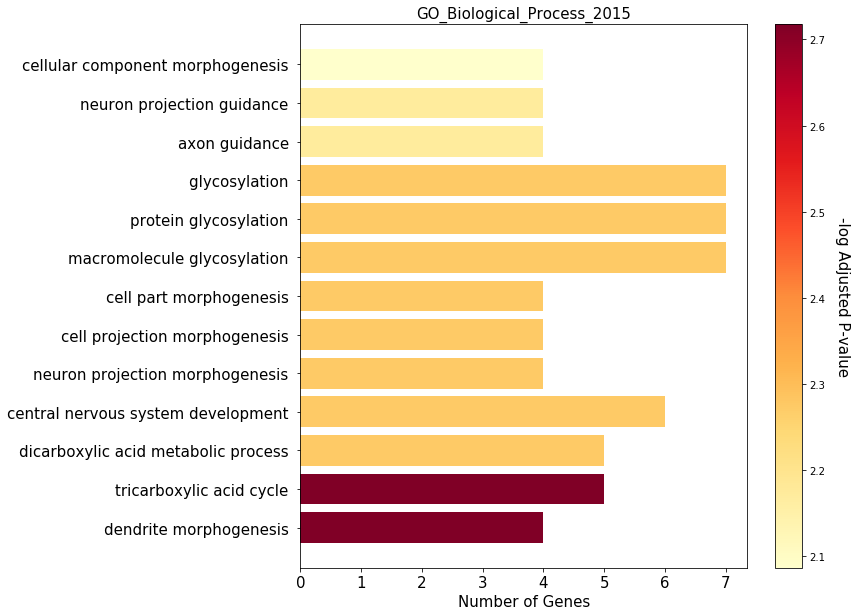

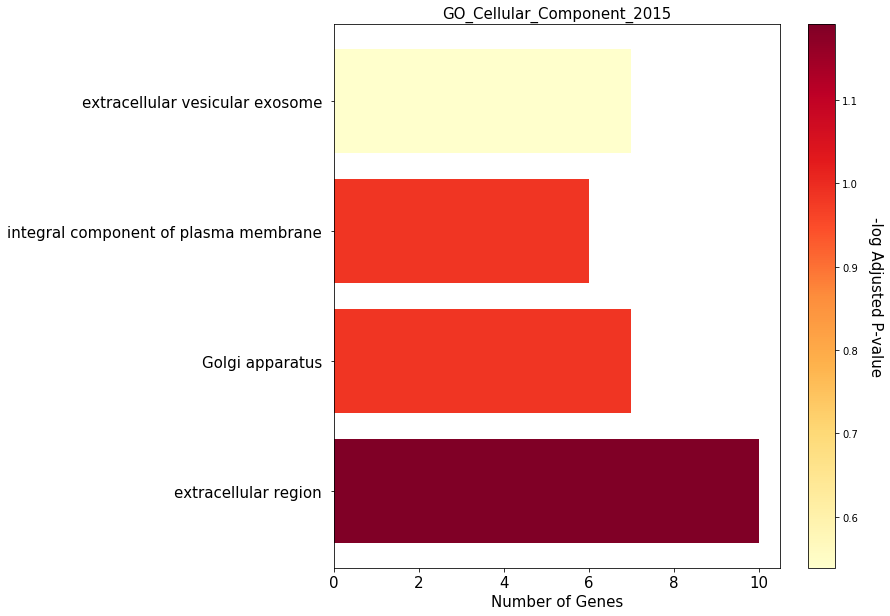

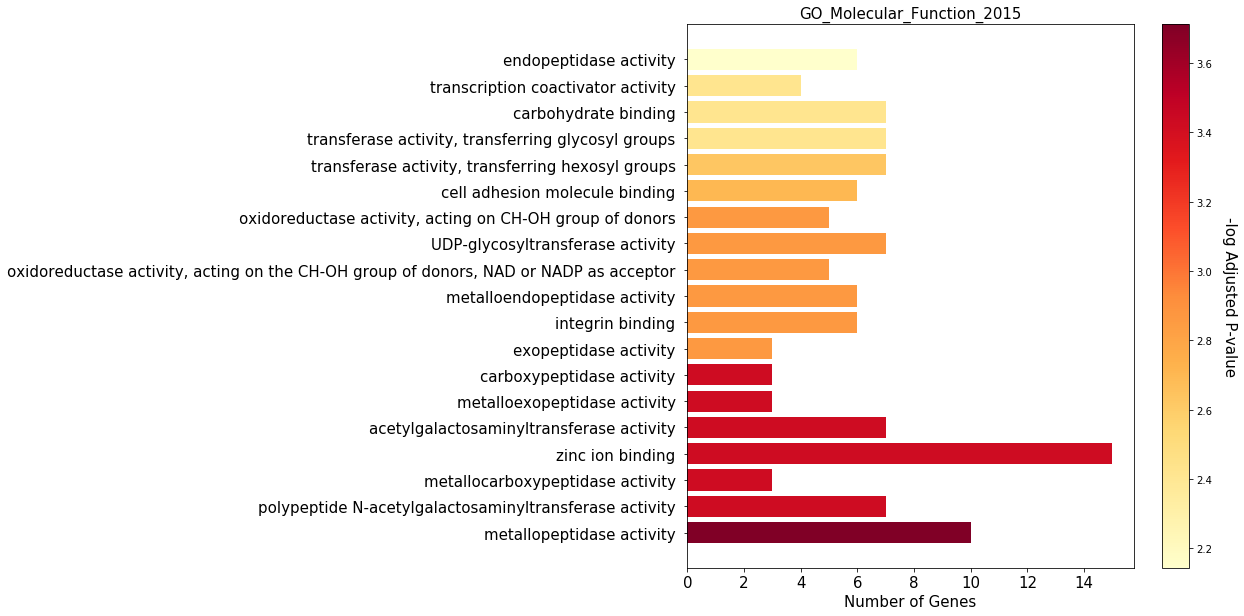

In [14]:
import matplotlib
from sklearn import preprocessing
import pandas
import gseapy
import matplotlib.pyplot as plt
import numpy as np


data = pandas.read_csv("data/imaging_network.csv")

idps= data["IDP name"].unique()
#for idp in idps:
idp=idps[4]
TG = data[data["IDP name"]==idp]["Target_Gene"]
gene_sets = ['GO_Biological_Process_2015','GO_Cellular_Component_2015','GO_Molecular_Function_2015']
output = gseapy.enrichr(gene_list = TG, description='pathway', gene_sets=gene_sets, outdir='test',cutoff=0.05, format='png')

for g in output.results["Gene_set"].unique():
    gene_set=output.results[output.results["Gene_set"]==g]
    gene_set = gene_set.reset_index()
    gene_set["Label"]=gene_set["Term"].str.split("(", n = 1, expand = True)[0]

    num_genes = gene_set["Genes"].str.len()
    p_values = 0-np.log(gene_set["Adjusted P-value"])

    cmap = matplotlib.cm.get_cmap('YlOrRd')
    norm = matplotlib.colors.Normalize(vmin=p_values.min(), vmax=p_values.max())

    colors=[]
    for i in p_values:
        rgba = cmap(norm(i))
        colors.append(rgba)
    plt.figure(figsize=(10,10))
    plt.title(g,fontsize=15)
    plt.xticks(fontsize=15)
    plt.xlabel("Number of Genes", fontsize=15)
    plt.yticks(gene_set.index,gene_set["Label"],fontsize=15)
    #plt.ylabel("Go Term", fontsize=15)
    plt.barh(gene_set.index, num_genes, color=colors)
    # Add a colorbar

    sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    cbar = plt.colorbar(sm)
    cbar.set_label('-log Adjusted P-value', rotation=270,labelpad=25, fontsize=15)
    plt.show()

## Promoter Addition

In [1]:
import pandas
network = pandas.read_csv("data/Network.csv")
biomart= pandas.read_csv("data/biomart.csv")
imaging_network = pandas.read_csv("data/imaging_network.csv")

In [2]:
promoter_section = network[network["Enhancer_Region"]=="Promoter"]

In [3]:
biomart.rename(columns={'Gene name':'Target_Gene'},inplace=True)

In [4]:
combined = pandas.merge(promoter_section, biomart, on='Target_Gene')

In [5]:
combined["Gene start (bp)"]=combined["Gene start (bp)"]-20000
combined["Gene end (bp)"]=combined["Gene end (bp)"]-20000
combined["Promoter"] = "True"

In [6]:
list(combined)

['Transcription_Factor',
 'Target_Gene',
 'Enhancer_Region',
 'Edge_Weight',
 'Chromosome',
 'Gene start (bp)',
 'Gene end (bp)',
 'Promoter']

In [7]:
snp = pandas.read_csv("data/41586_2018_571_MOESM4_ESM/SuppTable_5.csv",encoding='latin1')
snp["pos"] = snp.pos.astype(float)
L1 = list(network.columns.values) #dhhcgjhedc
L2 = L1+list(snp.columns.values)
metadata = pandas.DataFrame(columns=L2)
for i in range(snp.shape[0]):
    print(i)
    csnp=snp.iloc[i]
    overlap = combined[(combined['Chromosome']==csnp['chr'])&(combined['Gene start (bp)']<csnp['pos'])&(csnp['pos']<combined['Gene end (bp)'])].reset_index(drop=True)
    sn = pandas.DataFrame([csnp]*len(overlap)).reset_index(drop=True)
    metadata_entry = overlap.join(sn, lsuffix='_overlap',rsuffix='_sn')
    metadata = metadata.append(metadata_entry)
metadata=metadata.reset_index(drop=True)

0
1
2
3
4
5
6
7
8

C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)



9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281

In [8]:
list(metadata)

['Chromosome',
 'Edge_Weight',
 'Enhancer_Region',
 'Gene end (bp)',
 'Gene start (bp)',
 'IDP Index',
 'IDP name',
 'Promoter',
 'Target_Gene',
 'Transcription_Factor',
 'beta',
 'chr',
 'cluster index',
 'first SNP in cluster',
 'imputation info score',
 'maf',
 'nonref AF',
 'nonref allele',
 'p-value',
 'p-value (-log10)',
 'pos',
 'ref allele',
 'rsid',
 'se']

In [9]:
imaging_network["Promoter"]=False
imaging_network

,Edge_Weight,IDP Index,IDP name,Start,Stop,Target_Gene,Transcription_Factor,beta,chr,cluster index,...,ref allele,rsid,se,TGchr,TGstart,TGend,TFchr,TFstart,TFend,Promoter
0,0.227948,228.0,IDP_dMRI_TBSS_FA_External_capsule_R,180904964,180905963,IER5,MYOD1,-0.0898,1,16,...,C,rs3795503,0.0162,1,181088712,181092899,11,17719568,17722131,False
1,0.164154,228.0,IDP_dMRI_TBSS_FA_External_capsule_R,180904964,180905963,KIAA1614,SP7,-0.0898,1,16,...,C,rs3795503,0.0162,1,180913154,180951614,12,53326575,53345315,False
2,0.165928,228.0,IDP_dMRI_TBSS_FA_External_capsule_R,180904964,180905963,KIAA1614,MYOD1,-0.0898,1,16,...,C,rs3795503,0.0162,1,180913154,180951614,11,17719568,17722131,False
3,0.149984,228.0,IDP_dMRI_TBSS_FA_External_capsule_R,180904964,180905963,KIAA1614,SP7,-0.0898,1,16,...,C,rs3795503,0.0162,1,180913154,180951614,12,53326575,53345315,False
4,0.227948,651.0,IDP_dMRI_ProbtrackX_FA_str_l,180908591,180909590,IER5,MYOD1,0.1070,1,16,...,T,rs1609829,0.0172,1,181088712,181092899,11,17719568,17722131,False
5,0.126711,651.0,IDP_dMRI_ProbtrackX_FA_str_l,180908591,180909590,IER5,NR2F6,0.1070,1,16,...,T,rs1609829,0.0172,1,181088712,181092899,19,17231883,17245940,False
6,0.542486,651.0,IDP_dMRI_ProbtrackX_FA_str_l,180908591,180909590,IER5,TCF21,0.1070,1,16,...,T,rs1609829,0.0172,1,181088712,181092899,6,133889138,133895553,False
7,0.261166,651.0,IDP_dMRI_ProbtrackX_FA_str_l,180908591,180909590,IER5,TCF23,0.1070,1,16,...,T,rs1609829,0.0172,1,181088712,181092899,2,27149004,27156974,False
8,0.104129,651.0,IDP_dMRI_ProbtrackX_FA_str_l,180908591,180909590,KIAA1614,FOXD4L1,0.1070,1,16,...,T,rs1609829,0.0172,1,180913154,180951614,2,113498665,113501155,False
9,0.236696,651.0,IDP_dMRI_ProbtrackX_FA_str_l,180908591,180909590,KIAA1614,FOXE1,0.1070,1,16,...,T,rs1609829,0.0172,1,180913154,180951614,9,97853254,97856715,False


In [10]:
metadata.rename(columns={'Chromosome':'chr','Gene start (bp)':'Start','Gene end (bp)':'Stop'},inplace=True)
metadata = pandas.merge(metadata, biomart, on='Target_Gene')

In [11]:
metadata.rename(columns={'Chromosome':'TGchr','Gene start (bp)':'TGstart','Gene end (bp)':'TGend'},inplace=True)
biomart.rename(columns={'Target_Gene':'Transcription_Factor'},inplace=True)
metadata = pandas.merge(metadata, biomart, on='Transcription_Factor')

In [12]:
metadata.rename(columns={'Chromosome':'TFchr','Gene start (bp)':'TFstart','Gene end (bp)':'TFend'},inplace=True)
biomart.rename(columns={'Transcription_Factor':"Gene name"},inplace=True)
metadata

,chr,Edge_Weight,Enhancer_Region,Stop,Start,IDP Index,IDP name,Promoter,Target_Gene,Transcription_Factor,...,pos,ref allele,rsid,se,TGchr,TGstart,TGend,TFchr,TFstart,TFend
0,1.0,0.145419,Promoter,924581.0,903928.0,2644.0,IDP_T1_FIRST_left_putamen_volume_plus_IDP_T1_F...,True,SAMD11,MYOD1,...,909073.0,C,rs3892467,0.0235,1,923928,944581,11,17719568,17722131
1,3.0,0.103050,Promoter,49766542.0,49704294.0,327.0,IDP_dMRI_TBSS_MO_Cingulum_cingulate_gyrus_L,True,IP6K1,MYOD1,...,49734040.0,G,rs12496226,0.0168,3,49724294,49786542,11,17719568,17722131
2,3.0,0.179514,Promoter,61231459.0,59729310.0,1731.0,NET100_0575,True,FHIT,MYOD1,...,60214367.0,A,rs1472369,0.0191,3,59749310,61251459,11,17719568,17722131
3,3.0,0.179630,Promoter,61231459.0,59729310.0,1731.0,NET100_0575,True,FHIT,MYOD1,...,60214367.0,A,rs1472369,0.0191,3,59749310,61251459,11,17719568,17722131
4,4.0,0.126110,Promoter,98123240.0,97164093.0,481.0,IDP_dMRI_TBSS_L3_Uncinate_fasciculus_L,True,STPG2,MYOD1,...,97936878.0,G,rs6840385,0.0157,4,97184093,98143240,11,17719568,17722131
5,4.0,0.126110,Promoter,98123240.0,97164093.0,241.0,IDP_dMRI_TBSS_FA_Uncinate_fasciculus_L,True,STPG2,MYOD1,...,97947798.0,G,rs17247656,0.0172,4,97184093,98143240,11,17719568,17722131
6,4.0,0.172372,Promoter,121677113.0,121647955.0,3061.0,DKTatlas_rh_supramarginal_thickness,True,ANXA5,MYOD1,...,121662361.0,C,rs1511305,0.0154,4,121667955,121697113,11,17719568,17722131
7,4.0,0.172372,Promoter,121677113.0,121647955.0,3090.0,a2009s_rh_G_pariet_inf-Supramar_thickness,True,ANXA5,MYOD1,...,121662361.0,C,rs1511305,0.0157,4,121667955,121697113,11,17719568,17722131
8,4.0,0.172372,Promoter,121677113.0,121647955.0,2974.0,a2009s_lh_G_front_sup_thickness,True,ANXA5,MYOD1,...,121674851.0,T,rs75778110,0.0154,4,121667955,121697113,11,17719568,17722131
9,10.0,0.575294,Promoter,116253467.0,116036925.0,171.0,IDP_SWI_T2star_right_putamen,True,GFRA1,MYOD1,...,116252408.0,C,rs11196764,0.0224,10,116056925,116273467,11,17719568,17722131


In [13]:
set(metadata) ^ set(imaging_network)

{'Enhancer_Region', 'first SNP in cluster', 'net_chr', 'pheno index'}

In [16]:
metadata = metadata.drop("Enhancer_Region",axis=1)

In [19]:
metadata = metadata.drop("first SNP in cluster",axis=1)

In [21]:
imaging_network= imaging_network.drop("net_chr",axis=1)

In [23]:
imaging_network = imaging_network.drop("pheno index", axis=1)

In [38]:
imaging_network = imaging_network.reindex(sorted(imaging_network.columns), axis=1)
metadata=metadata.drop(metadata.columns[0], axis = 1) 

metadata = metadata.reindex(sorted(metadata.columns), axis=1)
all_combo = pandas.concat([imaging_network,metadata],axis=0)

C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [42]:
all_combo['IDP name'] = all_combo['IDP name'].map(lambda x: x.replace("_"," "))

In [45]:
all_combo.to_csv("data/imaging_network.csv",index=False)

In [43]:
all_combo['IDP name']

0                     IDP dMRI TBSS FA External capsule R
1                     IDP dMRI TBSS FA External capsule R
2                     IDP dMRI TBSS FA External capsule R
3                     IDP dMRI TBSS FA External capsule R
4                            IDP dMRI ProbtrackX FA str l
5                            IDP dMRI ProbtrackX FA str l
6                            IDP dMRI ProbtrackX FA str l
7                            IDP dMRI ProbtrackX FA str l
8                            IDP dMRI ProbtrackX FA str l
9                            IDP dMRI ProbtrackX FA str l
10                           IDP dMRI ProbtrackX FA str l
11                           IDP dMRI ProbtrackX FA str l
12                           IDP dMRI ProbtrackX FA str l
13                           IDP dMRI ProbtrackX FA str l
14                           IDP dMRI ProbtrackX FA str l
15                           IDP dMRI ProbtrackX FA str l
16                           IDP dMRI ProbtrackX FA str l
17            

In [51]:
gene_sets = ['GO_Biological_Process_2015','GO_Cellular_Component_2015','GO_Molecular_Function_2015']
idps= data["IDP name"].unique()
#for idp in idps:
idp=idps[0]
a = (data[data["IDP name"]==idp]["Transcription_Factor"]).append(data[data["IDP name"]==idp]["Target_Gene"])
a = a.drop_duplicates()
print(len(a))
output = gseapy.enrichr(gene_list = a, description='pathway', gene_sets=gene_sets, outdir='/static/images',cutoff=0.05, format='png')

output.results["Label"]=output.results["Term"].str.split("(", n = 1, expand = True)[0]

for g in output.results["Gene_set"].unique():
    gene_set=output.results[output.results["Gene_set"]==g]
    gene_set = gene_set.reset_index()
    print(gene_set["Genes"])

5


C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\gseapy\enrichr.py:133: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  res = pd.read_table(StringIO(response.content.decode('utf-8')))
C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\gseapy\enrichr.py:133: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  res = pd.read_table(StringIO(response.content.decode('utf-8')))
C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\gseapy\enrichr.py:133: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  res = pd.read_table(StringIO(response.content.decode('utf-8')))


0            TFAP2A
1             MYOD1
2             MYOD1
3            TFAP2A
4            TFAP2A
5            TFAP2A
6             MYOD1
7             MYOD1
8            TFAP2A
9            TFAP2A
10              SP7
11           TFAP2A
12            MYOD1
13            MYOD1
14           TFAP2A
15           TFAP2A
16           TFAP2A
17           TFAP2A
18           TFAP2A
19           TFAP2A
20            MYOD1
21           TFAP2A
22           TFAP2A
23            MYOD1
24           TFAP2A
25           TFAP2A
26     TFAP2A;MYOD1
27           TFAP2A
28           TFAP2A
29           TFAP2A
           ...     
130           MYOD1
131          TFAP2A
132           MYOD1
133           MYOD1
134          TFAP2A
135          TFAP2A
136           MYOD1
137           MYOD1
138          TFAP2A
139          TFAP2A
140           MYOD1
141           MYOD1
142          TFAP2A
143           MYOD1
144           MYOD1
145           MYOD1
146          TFAP2A
147           MYOD1
148          TFAP2A


    index                                               Term Overlap  \
26     26  transcription from RNA polymerase II promoter ...   2/470   

     P-value  Adjusted P-value  Old P-value  Old Adjusted P-value   Z-score  \
26  0.005258          0.032274     0.003205               0.02795 -2.342392   

    Combined Score         Genes                    Gene_set  \
26       12.293076  TFAP2A;MYOD1  GO_Biological_Process_2015   

                                             Label  
26  transcription from RNA polymerase II promoter   


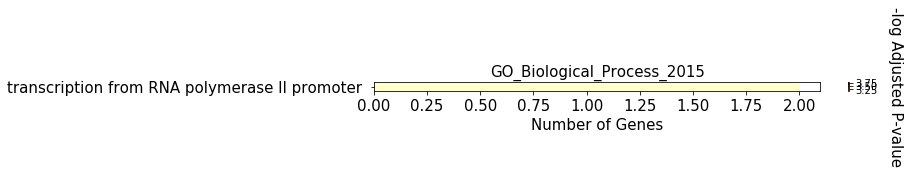

    index                                               Term Overlap  \
0     171                 core promoter binding (GO:0001047)   2/111   
1     172  RNA polymerase II core promoter proximal regio...   2/167   
2     173  core promoter proximal region sequence-specifi...   2/176   
3     174  core promoter proximal region DNA binding (GO:...   2/178   
4     175  RNA polymerase II transcription regulatory reg...   2/202   
5     176  RNA polymerase II regulatory region sequence-s...   2/284   
6     177  RNA polymerase II regulatory region DNA bindin...   2/288   
7     178    transcription coactivator activity (GO:0003713)   2/291   
8     179  transcription regulatory region sequence-speci...   2/340   
10    181  sequence-specific DNA binding RNA polymerase I...   2/397   
11    182                     chromatin binding (GO:0003682)   2/420   

     P-value  Adjusted P-value  Old P-value  Old Adjusted P-value   Z-score  \
0   0.000302          0.007352     0.000078             

ValueError: shape mismatch: objects cannot be broadcast to a single shape

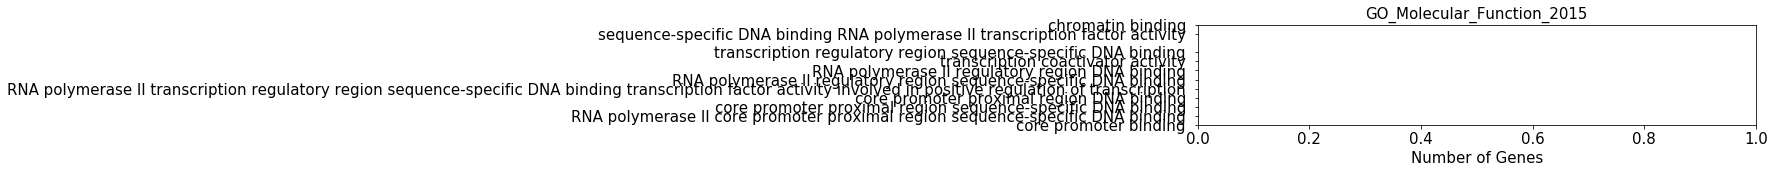

In [56]:
for g in output.results["Gene_set"].unique():
    gene_set=output.results[output.results["Gene_set"]==g]
    gene_set = gene_set.reset_index()
    gene_set["Label"]=gene_set["Term"].str.split("(", n = 1, expand = True)[0]

    num_genes = gene_set["Genes"].str.split(";").str.len()
    gene_set = gene_set[gene_set["Genes"].str.split(";").str.len()>1]
    if not gene_set.empty:
        print(gene_set)
        p_values = 0-np.log(gene_set["Adjusted P-value"])

        cmap = matplotlib.cm.get_cmap('YlOrRd')
        norm = matplotlib.colors.Normalize(vmin=p_values.min(), vmax=p_values.max())

        colors=[]
        for i in p_values:
            rgba = cmap(norm(i))
            colors.append(rgba)
        plt.figure(figsize=(10,len(gene_set.index)/6))
        plt.title(g,fontsize=15)
        plt.xticks(fontsize=15)
        plt.xlabel("Number of Genes", fontsize=15)
        plt.yticks(gene_set.index,gene_set["Label"],fontsize=15)
        #plt.ylabel("Go Term", fontsize=15)
        plt.barh(gene_set.index, num_genes, color=colors)
        # Add a colorbar

        sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cbar = plt.colorbar(sm)
        cbar.set_label('-log Adjusted P-value', rotation=270,labelpad=25, fontsize=15)

        plt.show()

## Seperate IDP

In [1]:
import pandas

In [2]:
idp_df = pandas.read_csv("data/imaging_network.csv")

In [6]:
idp_df["IDP name"].str.split()

0             [IDP, dMRI, TBSS, FA, External, capsule, R]
1             [IDP, dMRI, TBSS, FA, External, capsule, R]
2             [IDP, dMRI, TBSS, FA, External, capsule, R]
3             [IDP, dMRI, TBSS, FA, External, capsule, R]
4                     [IDP, dMRI, ProbtrackX, FA, str, l]
5                     [IDP, dMRI, ProbtrackX, FA, str, l]
6                     [IDP, dMRI, ProbtrackX, FA, str, l]
7                     [IDP, dMRI, ProbtrackX, FA, str, l]
8                     [IDP, dMRI, ProbtrackX, FA, str, l]
9                     [IDP, dMRI, ProbtrackX, FA, str, l]
10                    [IDP, dMRI, ProbtrackX, FA, str, l]
11                    [IDP, dMRI, ProbtrackX, FA, str, l]
12                    [IDP, dMRI, ProbtrackX, FA, str, l]
13                    [IDP, dMRI, ProbtrackX, FA, str, l]
14                    [IDP, dMRI, ProbtrackX, FA, str, l]
15                    [IDP, dMRI, ProbtrackX, FA, str, l]
16                    [IDP, dMRI, ProbtrackX, FA, str, l]
17            

In [8]:
for i in idp_df["IDP name"].unique():
    print(i)

IDP dMRI TBSS FA External capsule R
IDP dMRI ProbtrackX FA str l
IDP dMRI ProbtrackX FA str r
a2009s rh S central thickness
IDP T1 FAST ROIs L cerebellum crus I
IDP T1 FAST ROIs R cerebellum crus I
IDP dMRI TBSS L1 Anterior limb of internal capsule L
IDP dMRI TBSS L1 Posterior limb of internal capsule L
volume 4th-Ventricle
DKTatlas lh posteriorcingulate area
IDP dMRI TBSS ISOVF External capsule L
NET25 0199
volume CC Posterior
IDP dMRI TBSS MD Cingulum cingulate gyrus R
IDP dMRI TBSS MD Cingulum cingulate gyrus L
IDP dMRI TBSS MD Uncinate fasciculus R
IDP dMRI TBSS MD Uncinate fasciculus L
IDP dMRI ProbtrackX MD cgc r
IDP dMRI TBSS MD Anterior limb of internal capsule L
IDP dMRI TBSS MD External capsule L
IDP dMRI TBSS L1 External capsule L
IDP dMRI TBSS ICVF Anterior limb of internal capsule R
IDP dMRI TBSS ICVF Anterior limb of internal capsule L
IDP dMRI TBSS ICVF External capsule R
IDP dMRI TBSS ICVF External capsule L
IDP dMRI ProbtrackX MD cgc l
IDP dMRI ProbtrackX L1 unc l
IDP 

In [11]:
s = "hi \n so"
print(s)

In [1]:
import pandas
import seaborn as sns

In [2]:
gene_exp = pandas.read_csv("./data/UCLA.csv")
gene_exp = gene_exp.set_index('Unnamed: 0')

C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


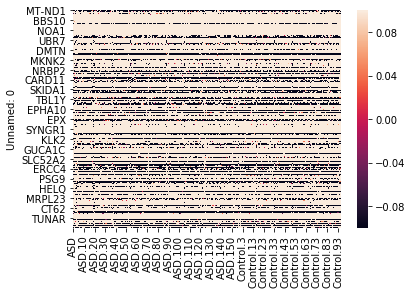

In [19]:
ax = sns.heatmap(np.sqrt(gene_exp))

In [21]:
np.log(gene_exp)

C:\Users\sanje\AppData\Local\conda\conda\envs\notebook\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


,ASD,ASD.1,ASD.2,ASD.3,ASD.4,ASD.5,ASD.6,ASD.7,ASD.8,ASD.9,...,Control.86,Control.87,Control.88,Control.89,Control.90,Control.91,Control.92,Control.93,Control.94,Control.95
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
MT-ND1,4.723575,6.785915,6.177405,7.771527,6.544444,6.622045,6.155261,7.123512,6.559119,6.240802,...,6.376268,6.377968,5.877428,5.749520,7.031980,7.312193,6.141521,5.981061,5.488772,6.946110
MT-ND2,5.092830,6.611046,6.357912,7.645359,6.635697,6.809768,6.016230,6.720051,6.396996,6.428364,...,6.450881,6.570084,6.016718,5.975488,7.131091,7.298384,6.423701,5.526409,5.256401,7.026889
MT-CO1,7.998399,8.695557,7.941726,8.761903,7.372219,9.198409,8.740433,8.990215,8.708354,8.799389,...,8.079838,8.626044,8.361330,8.164818,8.764170,8.925659,8.316596,7.942536,7.217942,9.680754
MT-CO2,6.087524,7.773805,6.883135,8.269888,6.883247,7.776304,7.264310,7.990262,7.443599,7.363305,...,7.126433,7.558845,7.295762,6.905152,7.789542,8.039918,7.106795,6.489691,5.906233,8.124417
MT-ATP8,5.287711,6.692406,6.419539,7.161568,6.673108,7.065332,5.955164,6.804393,6.830874,6.282753,...,6.947793,6.677952,6.259390,6.517612,6.791087,6.953856,6.288620,6.267068,5.914907,7.236548
MT-ATP6,5.865958,7.168125,6.657446,8.005611,7.001227,7.390780,6.571471,7.221339,6.947630,6.790198,...,7.056830,7.034802,6.620060,6.531504,7.384002,7.668561,6.779649,6.240100,5.879275,7.669523
MT-CO3,7.474290,7.761630,7.222449,7.888012,6.562303,8.174046,7.637225,7.916961,7.655310,7.708110,...,7.541460,7.685754,7.466359,7.234047,7.819918,7.974037,7.273668,7.567366,6.905633,8.995042
MT-ND3,6.480842,6.440516,6.577194,7.290143,6.445910,7.396163,6.257917,6.642995,6.838341,6.881976,...,6.974572,7.148699,7.139478,6.622005,6.652734,6.841167,6.638437,6.237993,5.852576,8.007966
MT-ND4L,5.373239,6.882314,6.208268,6.878862,5.920505,6.739621,6.344689,6.741701,6.553520,6.708963,...,6.615516,6.391297,6.153966,5.879051,6.482725,6.701690,5.872653,5.850390,5.431667,7.286233


In [3]:
df = gene_exp.T
df_norm = (df - df.mean()) / (df.max() - df.min())

In [4]:
df_norm

Unnamed: 0,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,...,ANKRD31,HMGCR,ATL1,SAV1,MAP4K5,FAM231B,TCEAL9,PRR21,DOHH,FAM231A
ASD,-0.095548,-0.111678,-0.109931,-0.138341,-0.109805,-0.107442,-0.079628,-0.041341,-0.135392,-0.099768,...,0.097427,0.470021,0.263980,-0.066844,-0.048269,0.144204,-0.057377,-0.045151,0.072907,0.144204
ASD.1,0.012632,-0.017707,-0.018717,0.035528,-0.026161,-0.009470,-0.031656,-0.043312,0.071777,0.022668,...,-0.125978,-0.173174,-0.312302,-0.207094,-0.003961,-0.051448,-0.090161,-0.045151,-0.063006,-0.051448
ASD.2,-0.043864,-0.044619,-0.114917,-0.090291,-0.052633,-0.063284,-0.111712,-0.036299,-0.058649,-0.074516,...,-0.125978,0.060454,-0.183911,0.192522,0.066145,0.019204,0.454544,-0.045151,-0.200270,0.019204
ASD.3,0.220782,0.200484,-0.006253,0.172584,0.040201,0.166886,-0.005780,0.020787,0.070861,0.146711,...,-0.083424,-0.150181,-0.218695,0.003281,-0.039108,0.024639,0.315519,-0.045151,0.393339,0.024639
ASD.4,-0.013956,-0.014704,-0.152041,-0.090281,-0.028280,-0.030154,-0.165848,-0.043053,-0.092546,-0.019992,...,0.044235,-0.124313,-0.299007,0.199246,0.305816,0.231161,0.623899,-0.045151,-0.175068,0.231161
ASD.5,-0.006101,0.008748,0.100012,0.036062,0.023941,0.024090,0.066396,0.033311,0.036407,0.017820,...,0.012320,-0.038499,0.171313,-0.010168,0.051002,0.024639,-0.068247,-0.045151,-0.000450,0.024639
ASD.6,-0.045341,-0.071658,-0.010378,-0.049657,-0.083978,-0.069937,-0.054126,-0.051302,-0.038836,-0.052042,...,0.086788,0.378458,0.094359,0.089736,0.082597,-0.051448,-0.048086,-0.045151,0.194419,-0.051448
ASD.7,0.062403,-0.003848,0.043546,0.087098,-0.013025,-0.002115,0.000622,-0.032566,0.036887,0.024670,...,-0.157893,0.295518,0.097448,-0.198449,-0.075751,0.019204,-0.060358,-0.045151,0.346085,0.019204
ASD.8,-0.012517,-0.040895,-0.016377,-0.024482,-0.009698,-0.036098,-0.051031,-0.019919,-0.002753,-0.017354,...,0.033597,-0.041989,-0.272818,0.018650,0.112322,0.035509,0.039046,-0.045151,-0.052205,0.035509
ASD.9,-0.039450,-0.037799,0.001163,-0.036316,-0.063421,-0.051820,-0.041667,-0.016740,0.029444,-0.032895,...,0.097427,-0.206227,-0.384287,0.139688,0.072875,0.573552,0.198759,-0.045151,-0.207921,0.573552


In [6]:
g = pandas.read_csv("data/brainspan.csv")
g = g.set_index('Gene')
g

,14 PCW,14 PCW.1,14 PCW.2,14 PCW.3,14 PCW.4,14 PCW.5,14 PCW.6,14 PCW.7,14 PCW.8,14 PCW.9,...,19 PCM.1,19 PCM.2,19 PCM.3,19 PCM.4,19 PCM.5,19 PCM.6,19 PCM.7,19 PCM.8,19 PCM.9,19 PCM.10
Gene,,,,,,,,,,,,,,,,,,,,,
RYBP,15.49,16.52,9.91,25.04,13.82,19.83,19.39,22.72,21.97,21.66,...,6.61,10.60,6.04,11.59,7.21,7.14,7.93,17.86,5.90,7.09
FOXO6,17.91,20.41,13.09,27.19,45.65,49.44,33.09,34.64,7.90,8.77,...,21.06,21.47,25.50,9.15,18.23,25.39,37.71,30.54,36.53,23.97
INPP5D,1.43,1.69,3.10,1.61,2.53,2.02,2.51,2.48,1.06,0.77,...,0.89,5.39,0.26,2.65,1.56,0.39,0.53,1.95,0.68,0.90
OBP2B,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SERTAD4,0.48,6.53,9.45,0.39,4.49,0.20,0.36,0.45,3.18,2.64,...,1.46,3.06,0.65,1.03,0.75,1.16,0.37,22.57,0.25,1.16
SLC16A1,7.83,17.37,7.52,7.74,14.48,7.50,7.06,8.12,19.40,12.88,...,5.34,16.25,7.85,7.22,8.21,5.64,7.52,12.64,4.41,9.02
KAT6B,13.40,17.98,15.80,16.91,17.73,31.01,14.40,25.02,11.01,7.36,...,12.58,11.56,9.37,6.54,11.89,9.49,9.82,12.03,7.59,15.72
HHAT,0.15,0.99,1.61,0.43,1.11,0.21,0.34,0.26,1.21,0.64,...,0.73,1.51,0.40,0.73,1.01,0.42,0.20,2.34,0.21,0.59
SURF6,9.28,14.16,21.76,9.15,15.26,14.40,11.09,12.02,4.99,4.67,...,20.10,16.50,14.40,17.17,17.66,15.42,21.82,21.91,16.75,17.76


In [7]:
df = g.T
df_norm = (df - df.mean()) / (df.max() - df.min())
df_norm

Gene,RYBP,FOXO6,INPP5D,OBP2B,SERTAD4,SLC16A1,KAT6B,HHAT,SURF6,RPS6KA1,...,FAM173A,CCDC142,ABCA12,EVPL,ERLIN2,NRXN3,KLK5,ANAPC13,KLK12,SIGLEC10
14 PCW,0.131907,0.058604,-0.090369,-0.027991,-0.031782,-0.065618,0.074064,-0.198047,-0.100692,-0.060811,...,-0.115178,-0.036749,-0.016180,-0.073937,-0.059806,-0.145823,-0.145223,0.044119,-0.006987,-0.073341
14 PCW.1,0.154540,0.086968,-0.077311,-0.027991,0.018288,0.048785,0.184692,-0.012206,0.104006,-0.028896,...,-0.081729,0.053847,0.409746,-0.073937,0.114422,0.014884,-0.140141,0.049550,-0.006987,-0.056709
14 PCW.2,0.009297,0.003919,-0.006492,-0.027991,0.042454,-0.069335,0.132035,0.124962,0.422798,0.013467,...,-0.018578,0.286646,-0.053217,-0.070934,0.129290,0.067814,-0.151576,0.064463,-0.006987,0.034768
14 PCW.3,0.341751,0.163891,-0.081329,-0.027991,-0.032527,-0.066697,0.158847,-0.136100,-0.106145,-0.046753,...,-0.140251,-0.130786,0.261598,-0.052916,-0.152830,-0.143739,-0.151576,-0.021554,-0.006987,-0.102447
14 PCW.4,0.095212,0.373331,-0.035121,-0.027991,0.001405,0.014128,0.178653,0.014342,0.150147,-0.019018,...,-0.114903,0.093985,0.113450,-0.064928,0.108703,-0.142655,-0.147764,0.015578,-0.006987,0.034768
14 PCW.5,0.227271,0.416331,-0.060736,-0.027991,-0.034100,-0.069575,0.499426,-0.184773,0.114073,-0.052832,...,-0.131875,0.110040,0.002339,-0.073937,-0.067050,-0.143406,-0.151576,-0.055723,-0.006987,-0.013050
14 PCW.6,0.217603,0.230830,-0.036125,-0.027991,-0.032776,-0.074851,0.098218,-0.156012,-0.024769,-0.032885,...,-0.123058,-0.052804,0.076413,-0.070934,-0.030832,-0.140488,-0.151576,0.035626,-0.006987,0.032689
14 PCW.7,0.290773,0.248416,-0.037632,-0.027991,-0.032031,-0.062140,0.354740,-0.173711,0.014241,-0.049603,...,-0.142070,0.029765,0.169006,-0.073937,-0.059044,-0.138238,-0.142682,-0.085152,-0.006987,-0.077499
14 PCW.8,0.274293,-0.054965,-0.108953,-0.027991,-0.009437,0.073128,0.016334,0.036466,-0.280642,-0.041624,...,-0.155571,-0.158308,0.002339,-0.073937,0.045417,-0.154742,-0.151576,0.109199,-0.006987,-0.040077
14 PCW.9,0.267482,-0.045094,-0.123519,-0.027991,-0.013906,-0.005059,-0.071830,-0.089640,-0.294065,-0.044284,...,-0.140472,-0.141107,0.020857,-0.070934,0.026355,-0.153241,-0.151576,0.073844,-0.006987,-0.067104


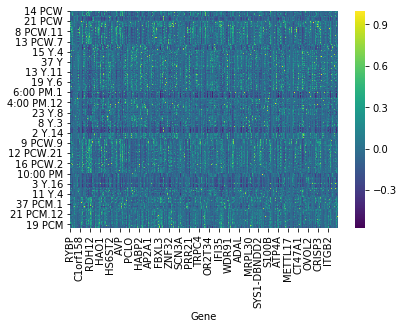

In [9]:
sns.heatmap(df_norm, cmap='viridis')

In [11]:
import pandas
data = pandas.read_csv("data/imaging_network.csv")
data.shape

(5322, 27)